In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install missingno


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import os

os.getcwd()

'/Users/fam/Desktop/Datatraining/housing_dcproject'

In [21]:
dc_condo= pd.read_csv('raw_data/dc_condo.csv', na_values='0')

In [23]:
dc_residential=pd.read_csv('raw_data/dc_residential.csv', na_values='0')

In [24]:
dc_addresspoint= pd.read_csv('raw_data/address_points.csv', na_values='0')

/var/folders/0z/7h02r9352jl5scr693rqkgsc0000gn/T/ipykernel_3455/3491487954.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  dc_addresspoint= pd.read_csv('raw_data/address_points.csv', na_values='0')


In [25]:
dc_condo.shape
a= set(dc_condo.columns)
a

{'AC',
 'AYB',
 'BATHRM',
 'BEDRM',
 'BLDG_NUM',
 'CMPLX_NUM',
 'EYB',
 'FIREPLACES',
 'GIS_LAST_MOD_DTTM',
 'HEAT',
 'HEAT_D',
 'HF_BATHRM',
 'LANDAREA',
 'LIVING_GBA',
 'OBJECTID',
 'PRICE',
 'QUALIFIED',
 'ROOMS',
 'SALEDATE',
 'SALE_NUM',
 'SSL',
 'USECODE',
 'YR_RMDL'}

In [26]:
dc_residential.shape
b=set(dc_residential.columns)
b

{'AC',
 'AYB',
 'BATHRM',
 'BEDRM',
 'BLDG_NUM',
 'CNDTN',
 'CNDTN_D',
 'EXTWALL',
 'EXTWALL_D',
 'EYB',
 'FIREPLACES',
 'GBA',
 'GIS_LAST_MOD_DTTM',
 'GRADE',
 'GRADE_D',
 'HEAT',
 'HEAT_D',
 'HF_BATHRM',
 'INTWALL',
 'INTWALL_D',
 'KITCHENS',
 'LANDAREA',
 'NUM_UNITS',
 'OBJECTID',
 'PRICE',
 'QUALIFIED',
 'ROOF',
 'ROOF_D',
 'ROOMS',
 'SALEDATE',
 'SALE_NUM',
 'SSL',
 'STORIES',
 'STRUCT',
 'STRUCT_D',
 'STYLE',
 'STYLE_D',
 'USECODE',
 'YR_RMDL'}

In [27]:
common_columns= a.intersection(b)
common_columns

{'AC',
 'AYB',
 'BATHRM',
 'BEDRM',
 'BLDG_NUM',
 'EYB',
 'FIREPLACES',
 'GIS_LAST_MOD_DTTM',
 'HEAT',
 'HEAT_D',
 'HF_BATHRM',
 'LANDAREA',
 'OBJECTID',
 'PRICE',
 'QUALIFIED',
 'ROOMS',
 'SALEDATE',
 'SALE_NUM',
 'SSL',
 'USECODE',
 'YR_RMDL'}

In [28]:

dc_properties= pd.merge(dc_residential, dc_condo, how= 'left' , on = ['SSL', 'AC',
 'AYB',
 'BATHRM',
 'BEDRM',
 'BLDG_NUM',
 'EYB',
 'FIREPLACES',
 'GIS_LAST_MOD_DTTM',
 'HEAT',
 'HEAT_D',
 'HF_BATHRM',
 'LANDAREA',
 'OBJECTID',
 'PRICE',
 'QUALIFIED',
 'ROOMS',
 'SALEDATE',
 'SALE_NUM',
 'SSL',
 'USECODE',
 'YR_RMDL'])
    

In [29]:
dc_properties.shape

(108285, 41)

Data Type explorations and matching

In [30]:
address_subset = dc_addresspoint.drop_duplicates(['SSL']).set_index("SSL")[["FULLADDRESS","CITY","STATE","ZIPCODE",
     "NATIONALGRID","LATITUDE","LONGITUDE","ASSESSMENT_NBHD",
                             "ASSESSMENT_SUBNBHD",
                                             "CENSUS_TRACT","CENSUS_BLOCK","WARD"]]





In [31]:
pre_dcclean= pd.merge(dc_properties, address_subset, how= 'left', on= 'SSL')

In [32]:
pre_dcclean.shape

(108285, 53)

In [33]:
pre_dcclean.describe()

,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,FIREPLACES,USECODE,LANDAREA,OBJECTID,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT
count,106993.000000,60426.000000,106983.000000,106865.000000,106596.000000,106846.000000,108045.000000,54366.000000,107035.000000,106909.000000,...,46538.000000,108048.000000,108250.000000,1.082850e+05,0.0,0.0,106341.000000,106341.000000,106341.000000,106287.000000
mean,2.122017,1.114868,7.278138,1.197670,7.421789,3.425987,1935.542246,2004.738513,1970.918045,2.084517,...,1.441145,13.193238,3387.151630,7.142504e+07,NaN,NaN,20012.102604,38.916560,-77.009887,5570.281963
std,1.095683,0.357153,5.095577,0.589548,2.335673,1.121569,30.883091,111.833397,16.256320,0.982104,...,0.832016,4.998454,6157.107421,3.150879e+04,NaN,NaN,7.692462,0.034874,0.043218,3501.680288
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,154.000000,202.000000,1900.000000,0.500000,...,1.000000,11.000000,1.000000,7.104528e+07,NaN,NaN,20001.000000,38.819731,-77.113909,101.000000
25%,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,1915.000000,2000.000000,1961.000000,2.000000,...,1.000000,11.000000,1575.000000,7.139800e+07,NaN,NaN,20007.000000,38.892536,-77.035291,2002.000000
50%,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1931.000000,2008.000000,1968.000000,2.000000,...,1.000000,12.000000,2332.000000,7.142508e+07,NaN,NaN,20011.000000,38.917683,-77.005643,6802.000000
75%,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1948.000000,2014.000000,1976.000000,2.000000,...,2.000000,13.000000,4165.000000,7.145215e+07,NaN,NaN,20018.000000,38.944249,-76.982946,8804.000000
max,30.000000,12.000000,13.000000,12.000000,101.000000,24.000000,2023.000000,20212.000000,2022.000000,275.000000,...,13.000000,995.000000,942632.000000,7.147922e+07,NaN,NaN,20052.000000,38.995540,-76.909758,11100.000000


In [34]:
dc_properties1= pre_dcclean.drop_duplicates()

In [35]:
dc_properties1.shape

(108285, 53)

In [36]:
dc_properties1.columns

Index(['SSL', 'BATHRM', 'HF_BATHRM', 'HEAT', 'HEAT_D', 'AC', 'NUM_UNITS',
       'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE',
       'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STYLE_D',
       'STRUCT', 'STRUCT_D', 'GRADE', 'GRADE_D', 'CNDTN', 'CNDTN_D', 'EXTWALL',
       'EXTWALL_D', 'ROOF', 'ROOF_D', 'INTWALL', 'INTWALL_D', 'KITCHENS',
       'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'OBJECTID',
       'CMPLX_NUM', 'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD'],
      dtype='object')

In [37]:
categories = [['CNDTN_D','CNDTN'],['HEAT_D','HEAT'],['STYLE','STYLE'],['STRUCT','STRUCT'],['GRADE_D','GRADE'],['ROOF_D','ROOF'],['EXTWALL_D','EXTWALL'],['INTWALL_D','INTWALL']]
cat_drop = []
for c in categories:
    dc_properties1[c[1]] = dc_properties1[c[0]].astype('category')
    cat_drop.append(c[0])
    #eliminate redundant dummy variables
dc_properties1.drop(cat_drop, inplace=True, axis=1)


In [38]:
dc_properties1.shape

(108285, 45)

In [39]:
dc_properties1.shape

(108285, 45)

In [40]:
#Dropping the two column
dc_properties2= dc_properties1.drop(columns=['CMPLX_NUM','LIVING_GBA'])

In [41]:
dc_properties2.shape

(108285, 43)

In [42]:
dc_properties2[(dc_properties2.isnull().sum(axis=1) !=0)]["PRICE"].describe()

count    5.094600e+04
mean     6.128622e+05
std      6.425302e+05
min      1.000000e+00
25%      2.699592e+05
50%      4.849700e+05
75%      8.000000e+05
max      2.510000e+07
Name: PRICE, dtype: float64

In [43]:
dc_properties2.to_csv('partly_cleandcproperties.csv')

In [44]:
dc_properties2.shape

(108285, 43)

In [45]:
dc_properties2.isnull().sum()

SSL                       0
BATHRM                 1292
HF_BATHRM             47859
HEAT                   1249
AC                     1301
NUM_UNITS              1420
ROOMS                  1689
BEDRM                  1439
AYB                     240
YR_RMDL               53919
EYB                    1250
STORIES                1376
SALEDATE                  0
PRICE                 46349
QUALIFIED                 0
SALE_NUM                  0
GBA                    1259
BLDG_NUM                  0
STYLE_D                1250
STRUCT_D               1249
GRADE                  1249
CNDTN                  1249
EXTWALL                1249
ROOF                   1249
INTWALL                1249
KITCHENS               1361
FIREPLACES            61747
USECODE                 237
LANDAREA                 35
GIS_LAST_MOD_DTTM         0
OBJECTID                  0
FULLADDRESS            1944
CITY                   1944
STATE                  1944
ZIPCODE                1944
NATIONALGRID        

In [46]:
#Checking Datetime:No issue on sale date (range is b/n 20th or 21st century)

print(dc_properties2["SALEDATE"].sort_values(ascending=True).head(5))
print(dc_properties2["SALEDATE"].sort_values(ascending=False).head(5))



108284    1900/01/01 00:00:00+00
77067     1900/01/01 00:00:00+00
29485     1900/01/01 00:00:00+00
49453     1900/01/01 00:00:00+00
77077     1900/01/01 00:00:00+00
Name: SALEDATE, dtype: object
5640      2022/07/18 00:00:00+00
46109     2022/07/18 00:00:00+00
100532    2022/07/18 00:00:00+00
100413    2022/07/18 00:00:00+00
102623    2022/07/18 00:00:00+00
Name: SALEDATE, dtype: object


In [47]:
dc_properties2.columns

Index(['SSL', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE_D', 'STRUCT_D',
       'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS',
       'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'OBJECTID',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD'],
      dtype='object')

In [48]:
print(dc_properties2["YR_RMDL"].sort_values(ascending=True).head(5))
print(dc_properties2["YR_RMDL"].sort_values(ascending=False).head(5))

56077     202.0
60559     218.0
14513    1880.0
74387    1880.0
17869    1900.0
Name: YR_RMDL, dtype: float64
19643    20212.0
62118    20167.0
27589     2104.0
68142     2023.0
44654     2023.0
Name: YR_RMDL, dtype: float64


In [49]:
dc_properties2["YR_RMDL"]=dc_properties2["YR_RMDL"].astype(str)

In [50]:
print(dc_properties2["YR_RMDL"].sort_values(ascending=True).head(5))
print(dc_properties2["YR_RMDL"].sort_values(ascending=False).head(5))

14513    1880.0
74387    1880.0
17869    1900.0
5342     1900.0
41047    1911.0
Name: YR_RMDL, dtype: object
54142    nan
66042    nan
66053    nan
66052    nan
66050    nan
Name: YR_RMDL, dtype: object


In [51]:
#df['sale_date'] = pd.to_datetime(df['sale_date'])

dc_properties2["YR_RMDL"]= pd.to_datetime(dc_properties2["YR_RMDL"], errors='ignore')

In [52]:
dc_properties["AYB"]= pd.to_datetime(dc_properties2["AYB"], errors='ignore')

In [53]:
dc_properties2["EYB"]= pd.to_datetime(dc_properties2["EYB"], errors='ignore')

In [54]:
dc_properties2.shape

(108285, 43)

In [55]:
dc_properties2.to_csv('dc_data.csv')

In [56]:
percentage_missingness= dc_properties2.isnull().mean()*100
percentage_missingness

SSL                    0.000000
BATHRM                 1.193148
HF_BATHRM             44.197257
HEAT                   1.153438
AC                     1.201459
NUM_UNITS              1.311354
ROOMS                  1.559773
BEDRM                  1.328901
AYB                    0.221637
YR_RMDL                0.000000
EYB                    1.154361
STORIES                1.270721
SALEDATE               0.000000
PRICE                 42.802789
QUALIFIED              0.000000
SALE_NUM               0.000000
GBA                    1.162673
BLDG_NUM               0.000000
STYLE_D                1.154361
STRUCT_D               1.153438
GRADE                  1.153438
CNDTN                  1.153438
EXTWALL                1.153438
ROOF                   1.153438
INTWALL                1.153438
KITCHENS               1.256868
FIREPLACES            57.022672
USECODE                0.218867
LANDAREA               0.032322
GIS_LAST_MOD_DTTM      0.000000
OBJECTID               0.000000
FULLADDR

Handling Missing Values
1. convert all missing values to Null
2. Analyz type and amount of Missinous 
3. Delete or Impute as necessery 
4. Evalute and compare the performance of the treated/imputed data

In [57]:
import missingno as msno

#Possiblereasonsformissingness
 #MissingCompletelyatRandom(MCAR),
 #MissingatRandom(MAR)or
 #MissingNotatRandom(MNAR)


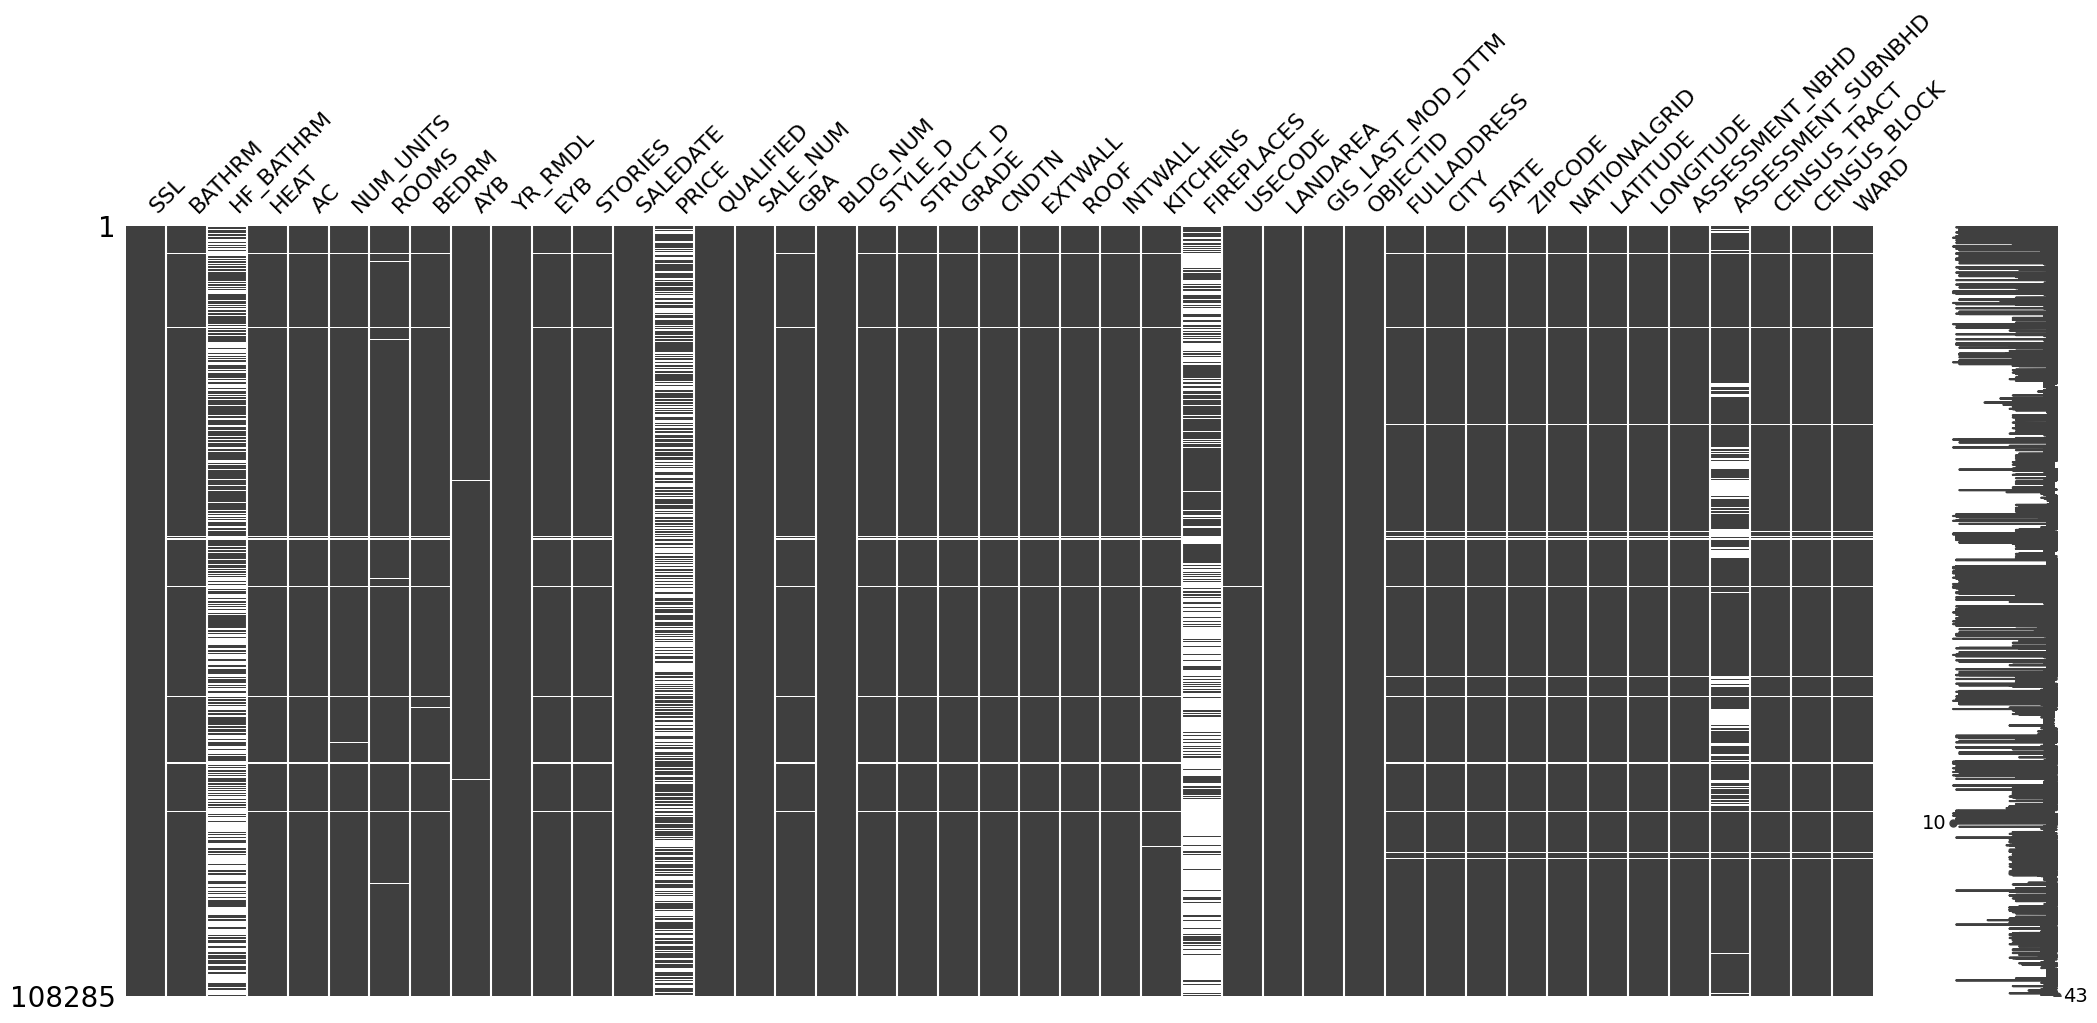

In [58]:
msno.matrix(dc_properties2);

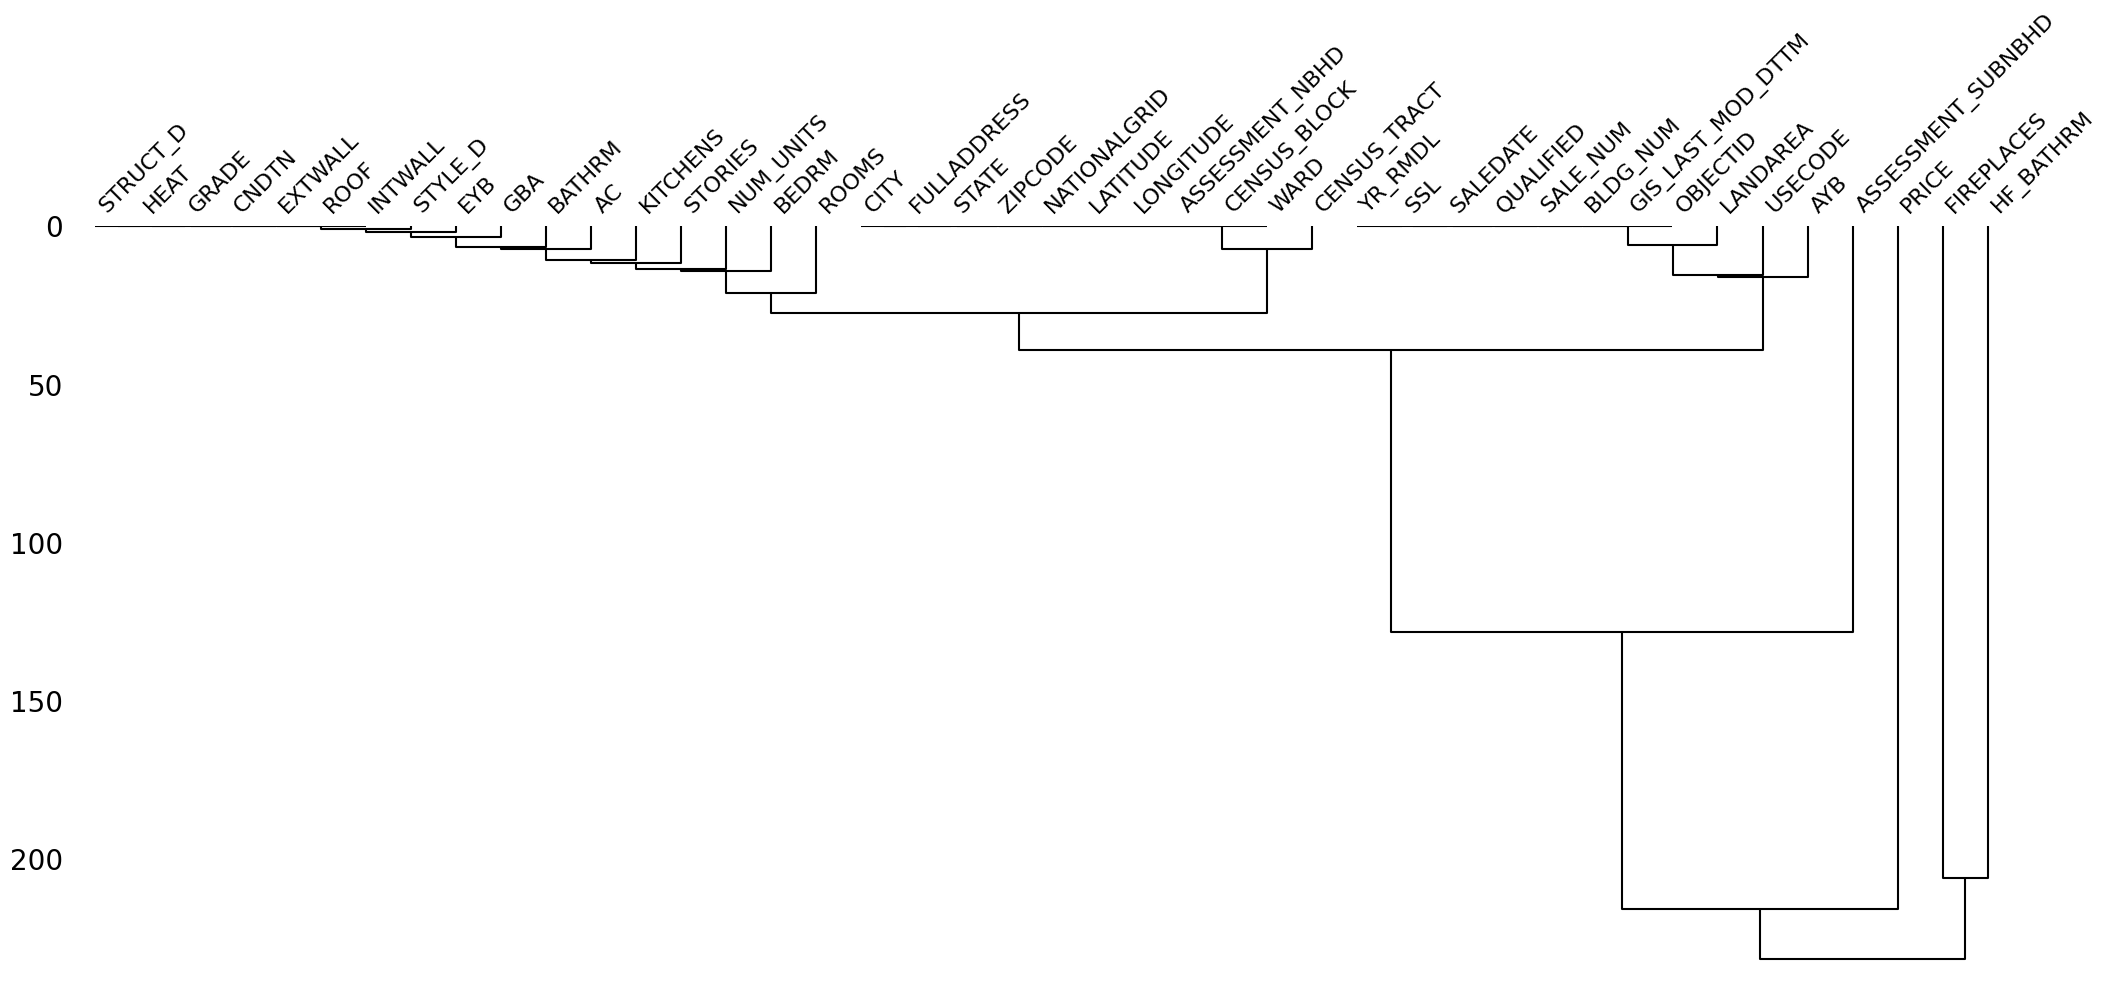

In [59]:
msno.dendrogram(dc_properties2);

In [60]:
dc_final=dc_properties2.dropna()


In [61]:
dc_final.to_csv("dc_final.csv")

In [62]:
price= dc_final.PRICE

In [63]:
price

2         1670000.0
6         1427078.0
9          840000.0
18        1236000.0
23        3150000.0
            ...    
108224     743000.0
108236     183000.0
108237     415000.0
108248     528212.0
108253     161000.0
Name: PRICE, Length: 15327, dtype: float64

In [64]:
price.mean()

1057755.205323938

In [65]:
price.max()

23960287.0

In [66]:
price.min()

1377.0

In [67]:
#plt.scatter(dc_final.PRICE, dc_final.index);

E-mail from customerservice.octo@dc.gov:
"""Thank you for your inquiry. I spoke with a colleague who maintains the property records. 
For the field/variable "QUALIFIED" the description is "Qualified Sales". 

The value "U" is unqualified sales meaning these sales are any transactions that 
are not reflective of the actual market value of a property, e.g., foreclosures 
and short sales. This valuation code can also reflect a transaction that does not 
meet the arm's-length requirement. This designation is determined by the Township Assessor.

The Value "Q" is qualified sales meaning these are usable sales: 
    an arm's-length transaction of a property between or among unrelated parties 
    (or entities) who (or which) are not under any duress to buy or sell the property 
    which has been offered on the open market and advertised for sale. 
    This designation is determined by the Township Assessor.""""

In [68]:
dc_final_q= dc_final[dc_final['QUALIFIED']=='Q']

In [69]:
dc_final_q.to_csv("dc_final_q.csv")

In [70]:
dc_final_q.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,OBJECTID,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT
count,13300.000000,13300.000000,13300.000000,13300.000000,13300.000000,13300.000000,13300.000000,1.330000e+04,13300.000000,13300.000000,13300.000000,13300.000000,13300.000000,13300.000000,13300.000000,1.330000e+04,13300.000000,13300.000000,13300.000000,13300.000000
mean,2.657444,1.124286,1.152632,8.025489,3.792932,1931.296316,2.224925,1.089382e+06,2.551880,2158.270902,1.000075,1.211504,1.518195,13.280226,3954.323985,7.140563e+07,20010.339323,38.924137,-77.035532,3924.826617
std,1.150634,0.377735,0.391672,2.338463,1.151366,33.005238,0.456914,8.931419e+05,1.748087,989.028615,0.008671,0.437545,0.892466,4.205727,3813.906746,2.484086e+04,6.203929,0.029704,0.042379,3278.599344
min,1.000000,1.000000,1.000000,1.000000,1.000000,1754.000000,1.000000,2.815500e+04,1.000000,582.000000,1.000000,1.000000,1.000000,11.000000,255.000000,7.104529e+07,20001.000000,38.820393,-77.113810,101.000000
25%,2.000000,1.000000,1.000000,6.000000,3.000000,1909.000000,2.000000,6.070000e+05,1.000000,1516.000000,1.000000,1.000000,1.000000,11.000000,1577.000000,7.138775e+07,20003.000000,38.902334,-77.070751,1004.000000
50%,3.000000,1.000000,1.000000,8.000000,4.000000,1927.000000,2.000000,9.000000e+05,2.000000,1880.000000,1.000000,1.000000,1.000000,12.000000,2683.500000,7.140004e+07,20011.000000,38.923429,-77.034333,2503.000000
75%,3.000000,1.000000,1.000000,9.000000,4.000000,1942.000000,2.500000,1.335000e+06,4.000000,2520.000000,1.000000,1.000000,2.000000,12.000000,5412.000000,7.141631e+07,20016.000000,38.948574,-76.997725,7000.000000
max,12.000000,12.000000,5.000000,88.000000,13.000000,2022.000000,5.000000,2.300000e+07,13.000000,11510.000000,2.000000,5.000000,13.000000,24.000000,155905.000000,7.147919e+07,20036.000000,38.979994,-76.914631,11100.000000


In [71]:
dc_final_q.shape

(13300, 43)